In [1]:
# import the libraries needed
import numpy as numpy
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Preparing the train and test dataset
---
- We have obtained the dataset from https://www.openpowerlifting.org/.
- From there, we randomised the data rows in the original CSV file and took out a total of 3,000 data points to be used for our train and test dataset.

In [5]:
train_test_combined = pd.read_csv('../datasets/train_test_combined.csv')
train_test_combined.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alana Carrasco,F,SBD,Raw,29.5,24-34,24-39,FR-O,68.60,72,...,Yes,USA,AZ,USAPL,IPF,27/8/2017,USA,AZ,NaN,Sun Devil Classic
1,Even Dysjaland,M,SBD,Raw,19.5,20-23,19-23,Juniors 19-23,94.65,105,...,Yes,NaN,NaN,NSF,IPF,13/6/2015,Norway,NaN,Ganddal,Klubbstevne
2,Alessandro Favorito,M,SBD,Single-ply,39.0,35-39,24-39,Open,89.40,90,...,Yes,Italy,NaN,FIPL,IPF,6/11/2004,Italy,NaN,Marina Di Carrara,Coppa Italia A Squadre
3,Sydney Martinez,F,SBD,Single-ply,NaN,NaN,NaN,Girls,55.16,56,...,Yes,USA,NaN,THSWPA,NaN,25/1/2014,USA,TX,JUNIOR HIGH,CARRIZO SPRINGS INVITATIONAL
4,Navy Villar,F,SBD,Single-ply,NaN,NaN,NaN,Girls,55.61,56,...,Yes,NaN,NaN,THSWPA,NaN,18/1/2018,USA,TX,Sadler,S&S Lady Rams Meet


In [7]:
# Split combined dataset into train and test
from sklearn.model_selection import train_test_split

train,test = train_test_split(train_test_combined, test_size = 0.25, random_state = 0)
train.to_csv('../datasets/train.csv', index = False)
test.to_csv('../datasets/test.csv', index = False)

print(train.shape)
print(test.shape)

(3000, 41)
(1000, 41)


## Exploratory Data Analysis (EDA)
---

In [5]:
# Import train dataset into a dataframe
train_df = pd.read_csv('../datasets/train.csv')
train_df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Gulnara Garifullina,F,B,Raw,39.0,35-39,24-39,Open,50.60,52,...,Yes,Russia,NaN,WPA-RUS,WPA,20/12/2014,Russia,MOW,Moscow,Russian Cup
1,Bryan Sledge,M,SBD,Raw,18.5,18-19,19-23,MR-T3,81.10,83,...,Yes,USA,AK,USAPL,IPF,24/2/2018,USA,NE,NaN,Capital City Clash
2,Cecily Gonzalez,F,SBD,Single-ply,NaN,NaN,NaN,Girls,57.61,60.1,...,Yes,NaN,NaN,THSWPA,NaN,10/1/2015,USA,TX,Zapata,Zapata Hawks Powerlifting Meet
3,Mike Jones #22,M,B,Raw,NaN,50-54,50-59,Masters 50-54,142.88,140+,...,NaN,NaN,NaN,SPF,NaN,21/11/2020,USA,GA,Loganville,Iron Turkey Bash
4,Sirkka Ek,F,SBD,Single-ply,NaN,NaN,24-39,Open,56.00,56,...,Yes,Finland,NaN,SVNL,IPF,8/3/1987,Finland,NaN,Salo,Naisten voimanoston SM -kisat


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2250 non-null   object 
 1   Sex               2250 non-null   object 
 2   Event             2250 non-null   object 
 3   Equipment         2250 non-null   object 
 4   Age               1605 non-null   float64
 5   AgeClass          1778 non-null   object 
 6   BirthYearClass    1688 non-null   object 
 7   Division          2250 non-null   object 
 8   BodyweightKg      2241 non-null   float64
 9   WeightClassKg     2234 non-null   object 
 10  Squat1Kg          854 non-null    float64
 11  Squat2Kg          847 non-null    float64
 12  Squat3Kg          825 non-null    float64
 13  Squat4Kg          5 non-null      float64
 14  Best3SquatKg      1436 non-null   float64
 15  Bench1Kg          1359 non-null   float64
 16  Bench2Kg          1348 non-null   float64


### Identifying numeric and categorical variables
---
- Let's first identify numeric and categorical variables using information from above and the data's
description text.

In [8]:
# Identify numeric variables
numeric_df = train_df[['Age', 'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
                      'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg',
                      'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg', 'Wilks', 'Glossbrenner', 'Goodlift']]

categorical_df = train_df[['Sex', 'Equipment', 'AgeClass', 'BirthYearClass', 'Division', 'WeightClassKg', 
                          'Place', 'Country', 'State', 'Federation', 'ParentFederation']]

In [9]:
numeric_df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Wilks,Glossbrenner,Goodlift
count,1605.000000,2241.000000,854.000000,847.000000,825.000000,1436.00000,1359.000000,1348.000000,1301.000000,1988.000000,997.000000,977.000000,932.000000,1593.000000,2115.000000,2110.000000,2110.000000,1910.000000
mean,30.680685,82.278407,109.295152,97.156777,36.206582,160.69438,79.973061,56.576818,-9.782936,112.996761,158.354935,131.770553,38.607017,179.110433,341.703674,259.140957,241.254455,64.836042
std,12.333469,22.370455,133.183796,154.612472,184.168085,70.81454,101.492763,123.653911,138.999408,59.802011,97.676355,148.563487,201.265440,65.473703,202.239891,127.862570,120.611187,16.701912
min,6.000000,27.200000,-387.500000,-442.250000,-410.000000,-232.50000,-360.000000,-468.000000,-468.000000,-250.000000,-290.000000,-360.000000,-400.000000,25.000000,20.000000,24.500000,23.860000,13.480000
25%,21.500000,65.700000,85.625000,80.000000,-150.000000,106.59000,50.000000,-32.562500,-130.000000,61.230000,120.000000,115.000000,-177.500000,125.000000,182.500000,127.920000,121.865000,52.762500
50%,27.500000,81.200000,137.500000,140.000000,110.000000,149.69000,100.000000,90.000000,-52.500000,110.000000,170.000000,170.000000,130.000000,172.500000,290.300000,274.655000,251.305000,64.965000
75%,38.000000,97.700000,186.875000,192.500000,185.000000,205.00000,141.250000,140.000000,117.500000,150.000000,220.000000,220.000000,205.000000,230.000000,484.040000,360.065000,333.707500,76.347500
max,81.500000,202.480000,419.570000,430.000000,445.000000,501.22000,460.500000,350.000000,360.000000,460.500000,345.000000,370.000000,370.000000,370.000000,1202.020000,686.930000,657.960000,127.340000


### Exploring variables regarding contestant's personal information
---

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


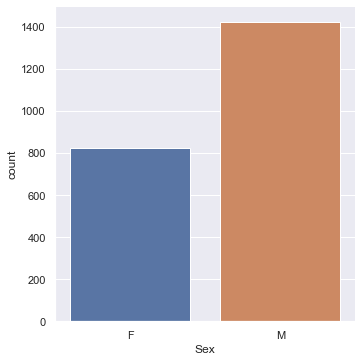

In [10]:
# Explore the distribution of the genders
sb.catplot('Sex', data = categorical_df, kind = 'count')

### Observation
---
There seems to be an imbalance in the no. of females to males, with female accounting only for 36% of datapoints. This could be a source of problem when building models later on that uses the variable `Sex`.

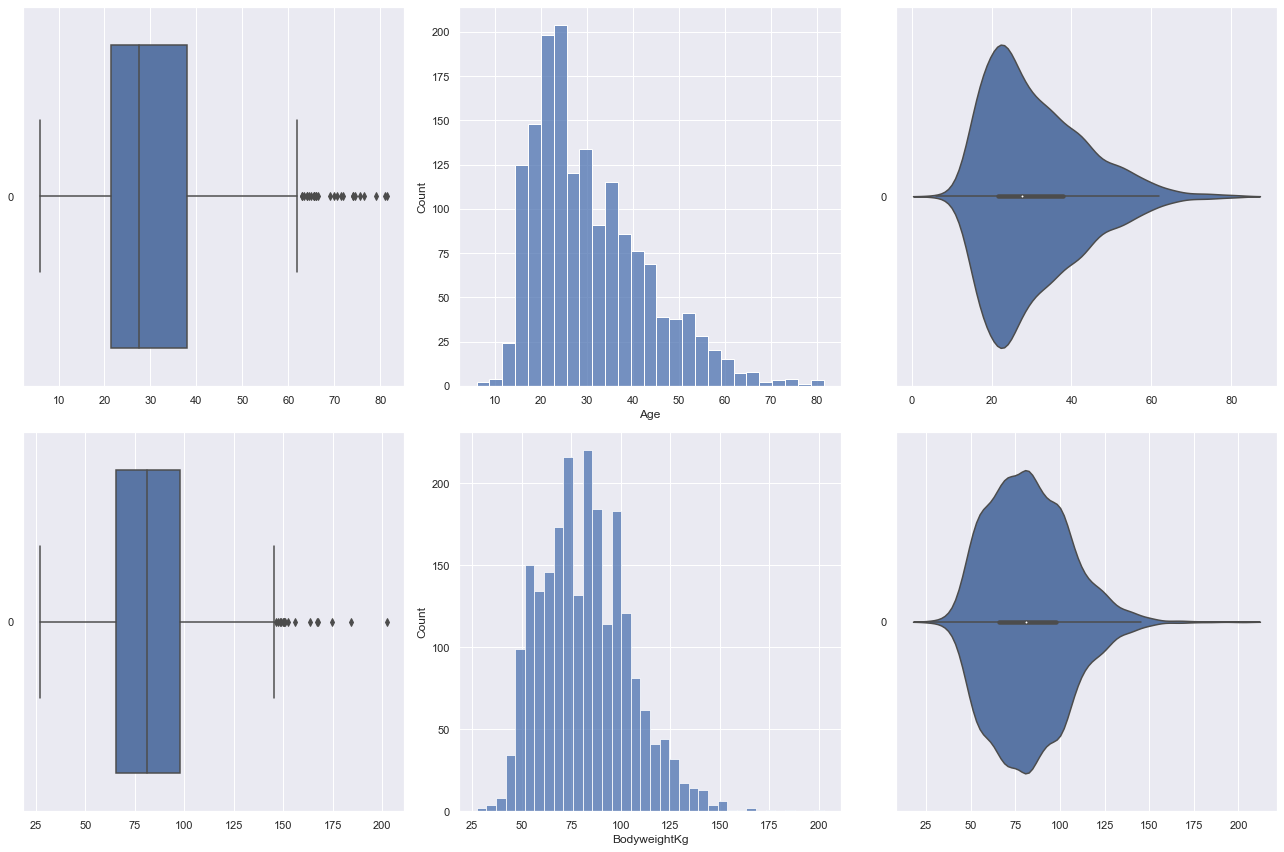

In [11]:
# Explore numeric variables related to a contestant's personal data: Age, BodyweightKg
f, axes = plt.subplots(2, 3, figsize = (18, 12))
numeric_personalData_df = numeric_df[['Age', 'BodyweightKg']]

count = 0

for var in numeric_personalData_df:
    sb.boxplot(data = numeric_personalData_df[var], orient = 'h', ax = axes[count, 0])
    sb.histplot(data = numeric_personalData_df[var], ax = axes[count, 1])
    sb.violinplot(data = numeric_personalData_df[var], orient = 'h', ax = axes[count, 2])
    count += 1
    
plt.tight_layout()

### Observation
---

#### Age:
- Considering box plot, seems that most powerlifters are young adults, from the age of 20 to 40.
- Interestingly, there are quite a few outliers, that are above 60 years old.
- How are the older powerlifters performing compared to their younger counterparts?
- From violin plot, distribution seems to be positively skewed.

#### BodyWeight (kg)
- Considering box plot, the majority of data seems to be concentrated within 70 to 95kg.
- Some powerlifters seem to have a much higher weight, slightly more than double the median.
- Is there a weight class for these outliers? 
- From violin plot, distribution seem to be less skewed.

### Exploring variables regarding weight lifted
---

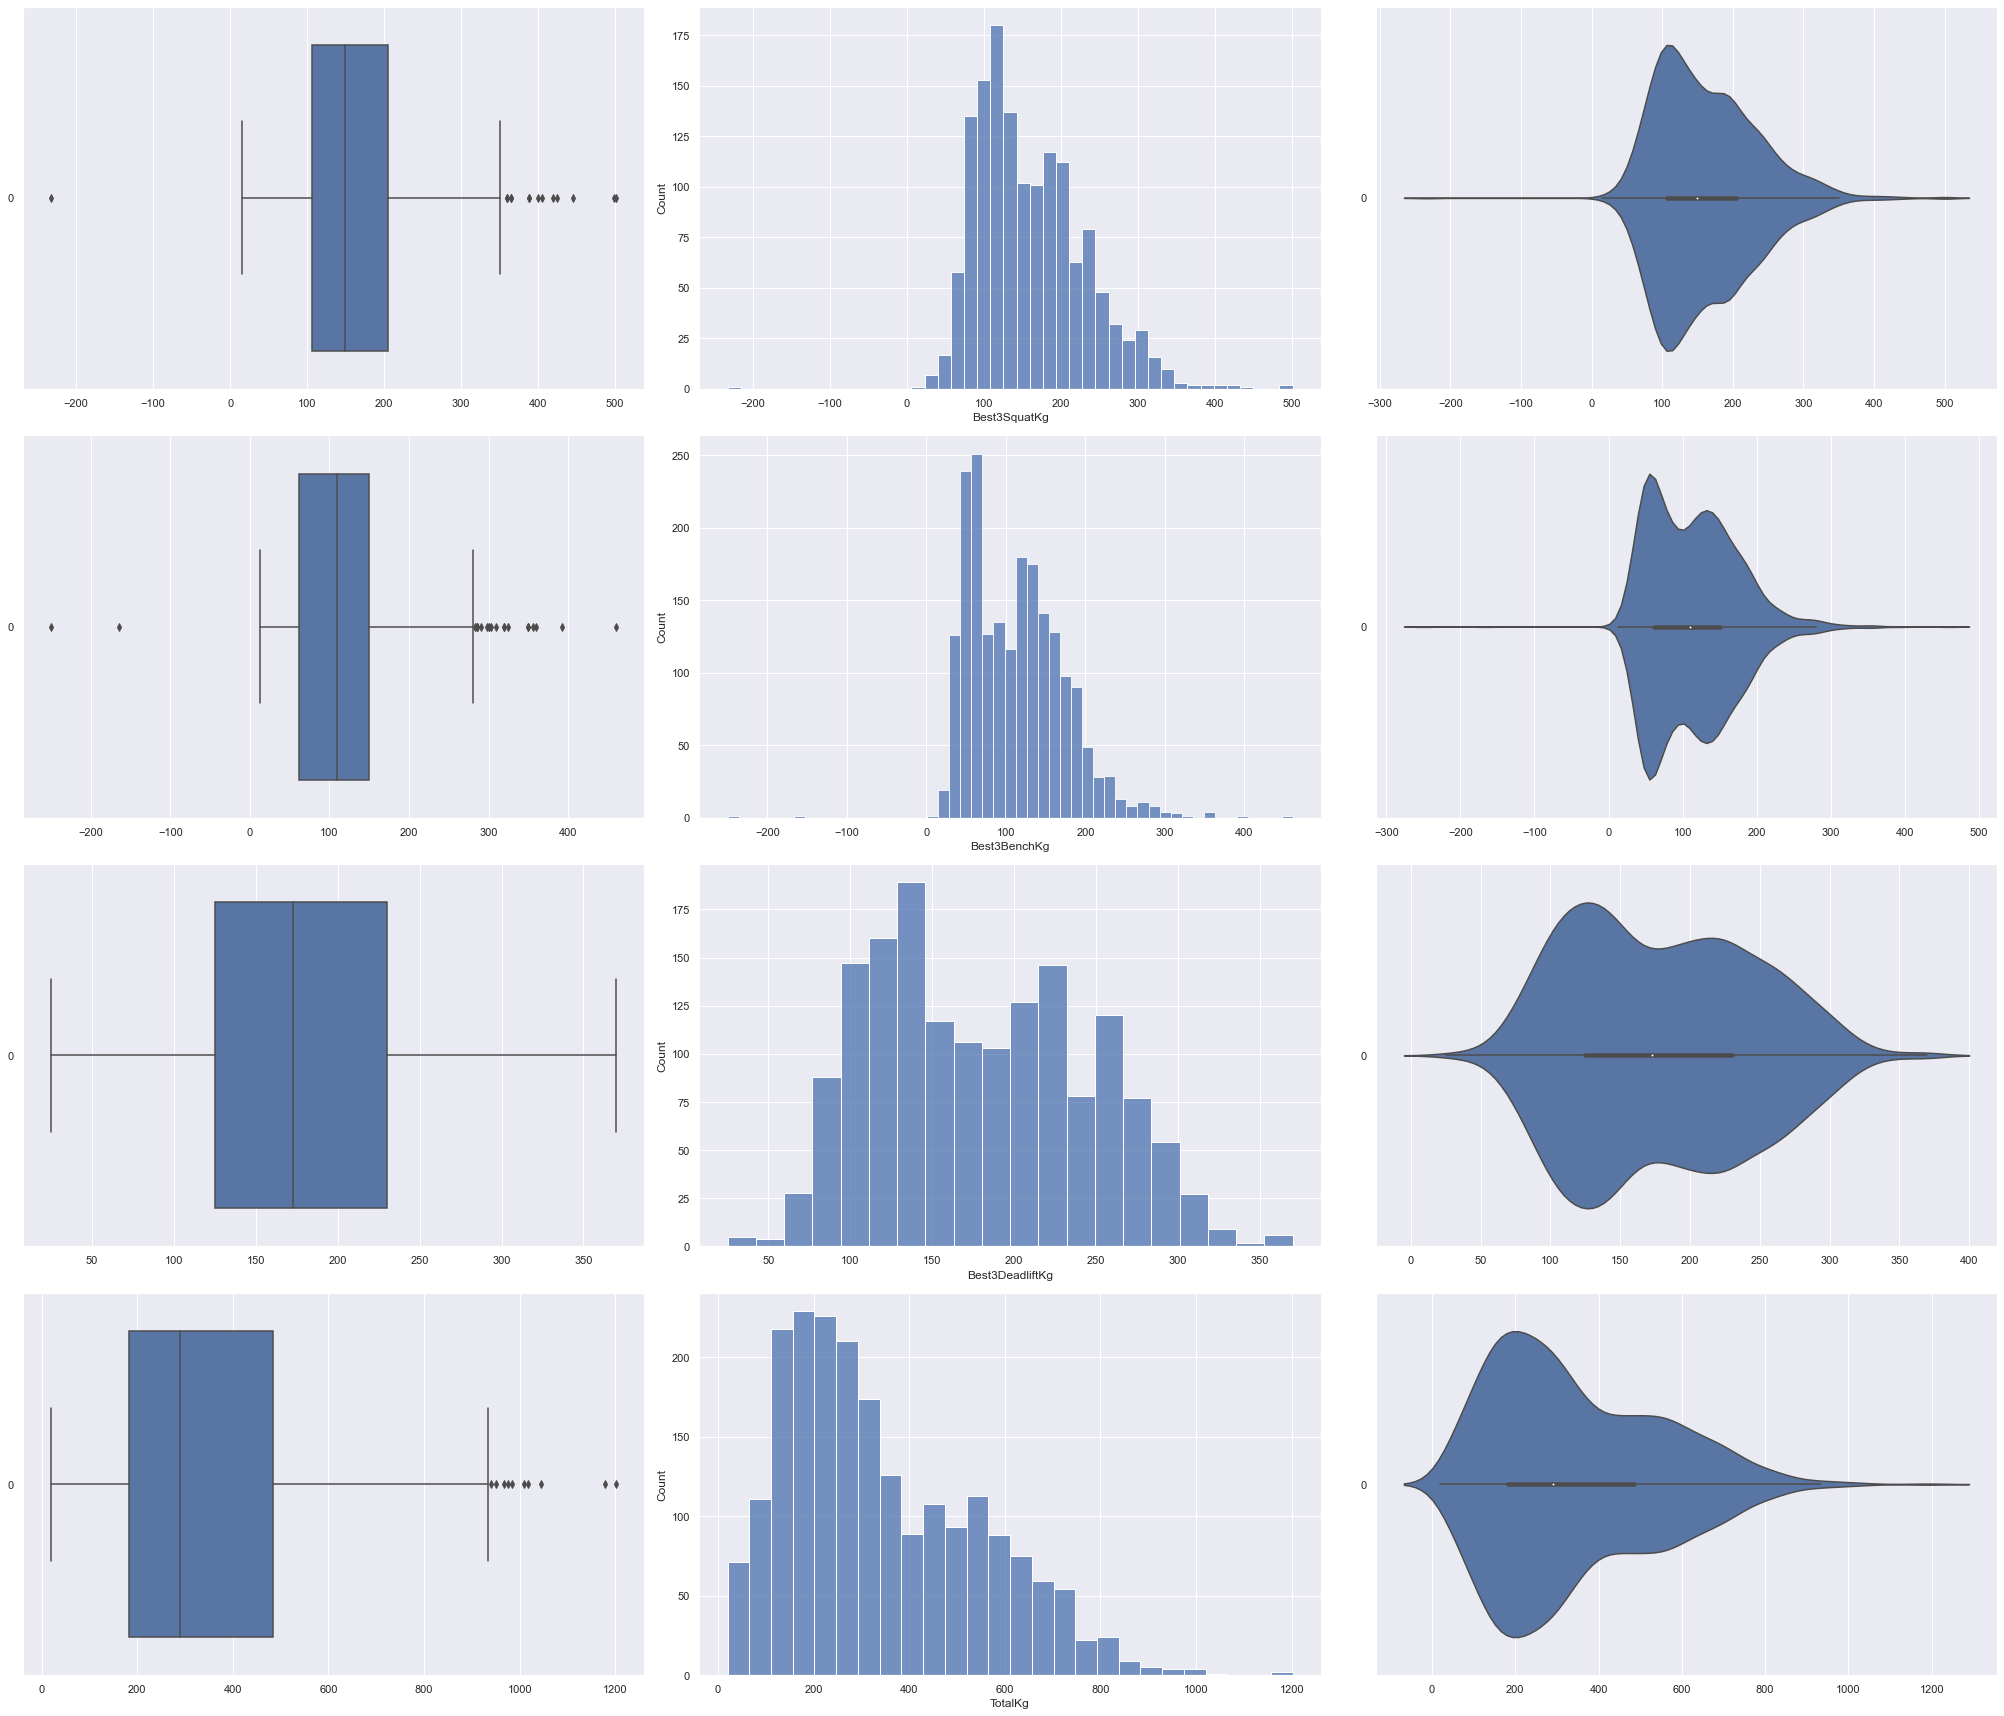

In [12]:
# For this section, we will use `Best3SquatKg`, `Best3BenchKg`, `Best3DeadliftKg` and `TotalKg`.
# TotalKg is the sum of `Best3SquatKg`, `Best3BenchKg`, and `Best3DeadliftKg`, if all three lifts were a success.

f, axes = plt.subplots(4,3, figsize = (28,24))
weightsLifted_df = numeric_df[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']]

count = 0;
for var in weightsLifted_df:
    sb.boxplot(data = weightsLifted_df[var], orient = 'h', ax = axes[count, 0])
    sb.histplot(data = weightsLifted_df[var], ax = axes[count, 1])
    sb.violinplot(data = weightsLifted_df[var], orient = 'h', ax = axes[count, 2])
    count += 1

plt.tight_layout()

In [13]:
weightsLifted_df.skew()

Best3SquatKg       0.708153
Best3BenchKg       0.645335
Best3DeadliftKg    0.279854
TotalKg            0.747750
dtype: float64

### Observation
---
- For every exercise, there seems to have two values about which data is most concentrated about it, as seen by the violin plots having two peaks.
- Observing violin plots and the skewness, Squat exercise seems to have the greatest positive skewness from normal distribution.
- Despite Squat and Bench appearing to have more datapoints concentrated about its median, the interquartile range is almost the same for all three different exercises, ranging from ~ 80 - 100 kg.
- Scale seems to be disturbed by negative values for Squat and Bench, which represent failed Attempts.
- Let's remove these negative values and observe the distributions again.

No. of failed attempts for Squat:  1
No. of failed attempts for Bench:  2


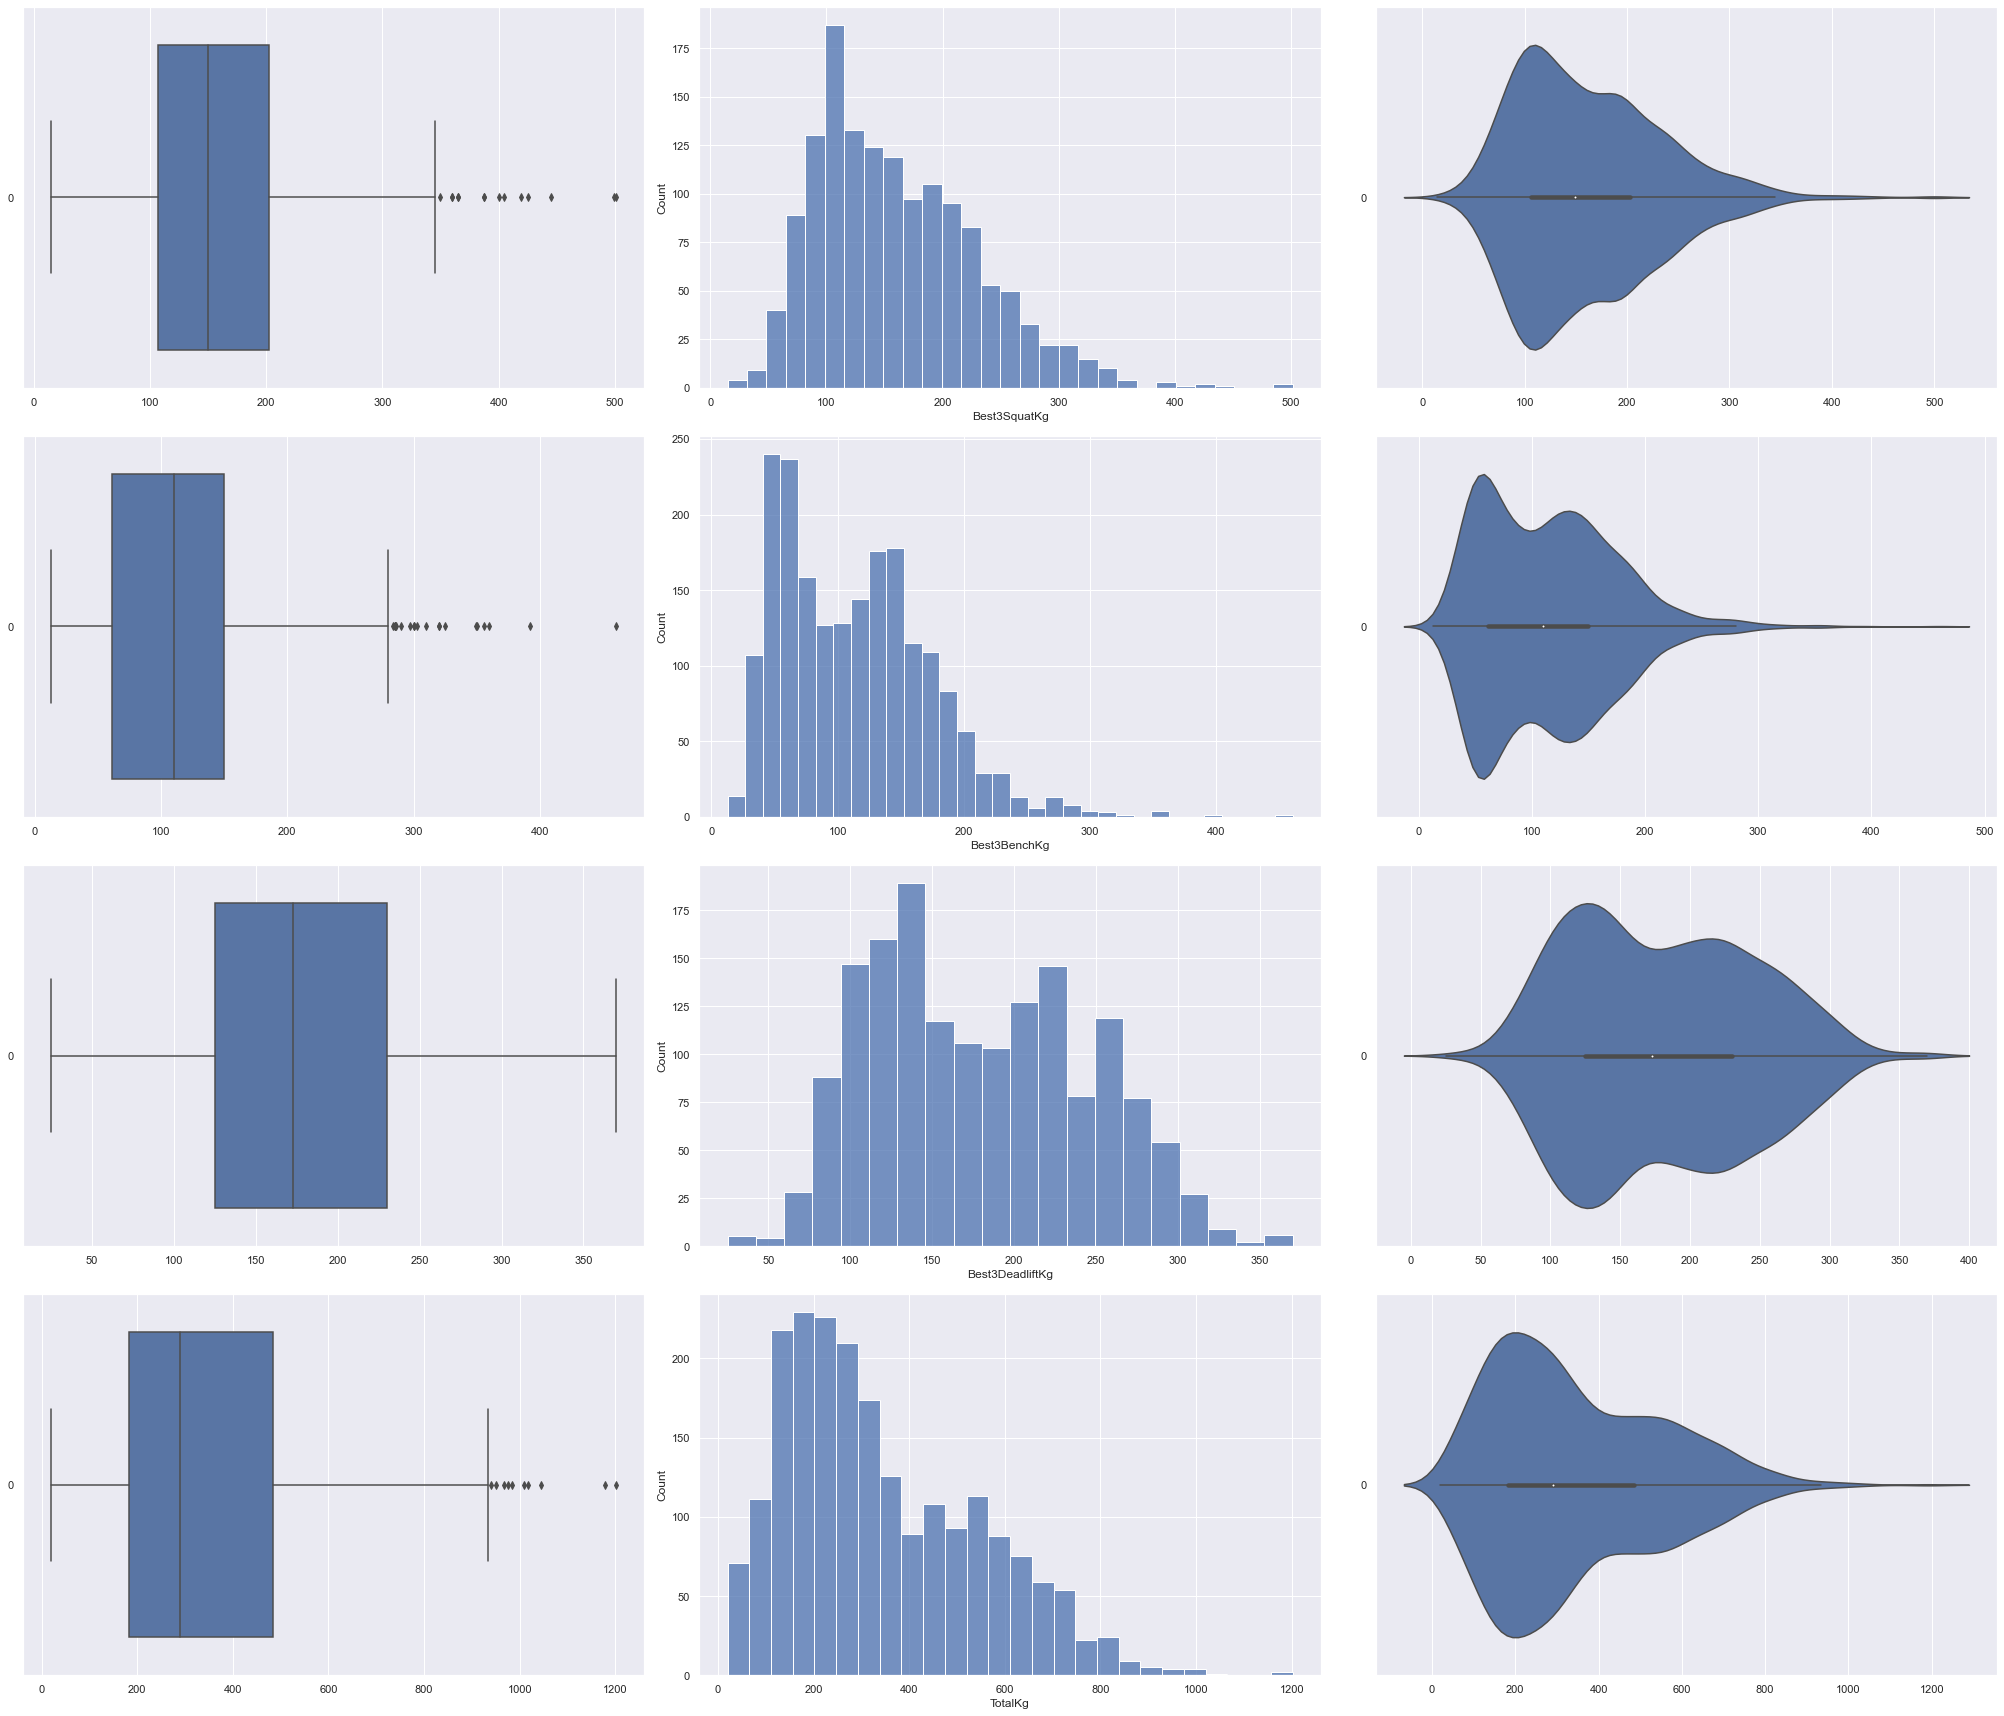

In [14]:
# Removing failed attempts data points
print("No. of failed attempts for Squat: ", weightsLifted_df[weightsLifted_df['Best3SquatKg'] < 0].shape[0])
print("No. of failed attempts for Bench: ", weightsLifted_df[weightsLifted_df['Best3BenchKg'] < 0].shape[0])

failedAttempts = weightsLifted_df[(weightsLifted_df['Best3SquatKg'] < 0) | (weightsLifted_df['Best3BenchKg'] < 0)]
weightsLiftedSuccessOnly_df = weightsLifted_df.drop(index = failedAttempts.index, axis = 0)

# Replot visualisations
f, axes = plt.subplots(4,3, figsize = (28,24))

count = 0;
for var in weightsLifted_df:
    sb.boxplot(data = weightsLiftedSuccessOnly_df[var], orient = 'h', ax = axes[count, 0])
    sb.histplot(data = weightsLiftedSuccessOnly_df[var], ax = axes[count, 1])
    sb.violinplot(data = weightsLiftedSuccessOnly_df[var], orient = 'h', ax = axes[count, 2])
    count += 1

plt.tight_layout()

### Observation
---
- After removing failed attempts, concentration of data about the median seems to be more accurately displayed now.
- Squat seems to have the most number of outliers beyond the right whisker with the largest max value, followed by Bench and then Deadlift

### Exploring Correlations between variables
---
- Not all events do all three exercises which means that not all events would record a `TotalKg` which is the sum of the best from each of the three exercises. For simplicity sake, let's explore only the events where all three exercises are done.
- Firstly, let's explore correlation between `TotalKg` lifted and the contestant's personal information.
- Next, let's explore correlation between `TotalKg` and other factors like `Equipment`, `Division`.
- Lastly, let's explore correlation between the three different exercises.

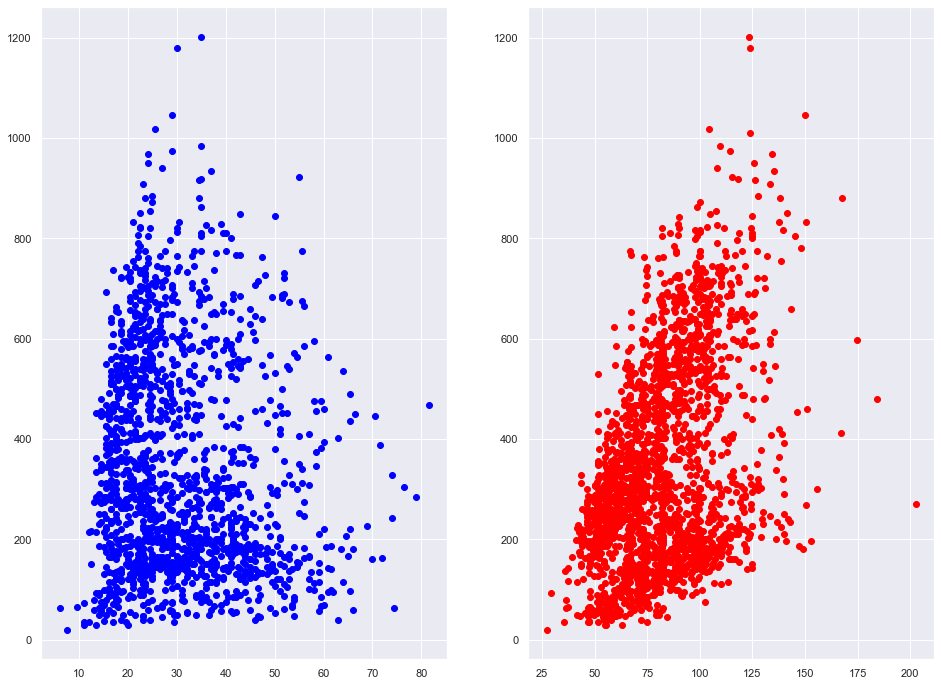

In [15]:
# For the first part, the variables used in exploration would be:
# Numeric: Age, BodyweightKg
correlationWithPersonal_df = train_df[['Age', 'BodyweightKg', 'Sex', 'Country', 'TotalKg']]

f, axes = plt.subplots(1, 2, figsize =(16,12))

axes[0].scatter(x = 'Age', y = 'TotalKg', data = correlationWithPersonal_df, color = 'blue')
axes[1].scatter(x = 'BodyweightKg', y = 'TotalKg', data = correlationWithPersonal_df, color = 'red')

<AxesSubplot:>

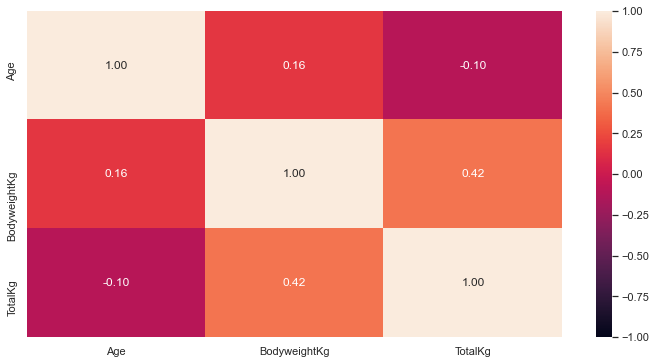

In [16]:
numericCorrelationWithPersonal_df = correlationWithPersonal_df[['Age' , 'BodyweightKg', 'TotalKg']]

f = plt.figure(figsize = (12, 6))
sb.heatmap(numericCorrelationWithPersonal_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

### Observation
---

#### Age with TotalKg:
- From scatterplot and heatmap, there is a very weak negative correlation of -0.1. However, it is lower than what we would expect.
<br>
<br>

#### BodyweightKg with TotalKg:
- From scatterplot and heatmap, there is a moderately strong positive correlation of 0.42 between BodyweightKg and TotalKg. This may make it a useful variable for predicting TotalKg as a moderately strong linear relationship is suggested.

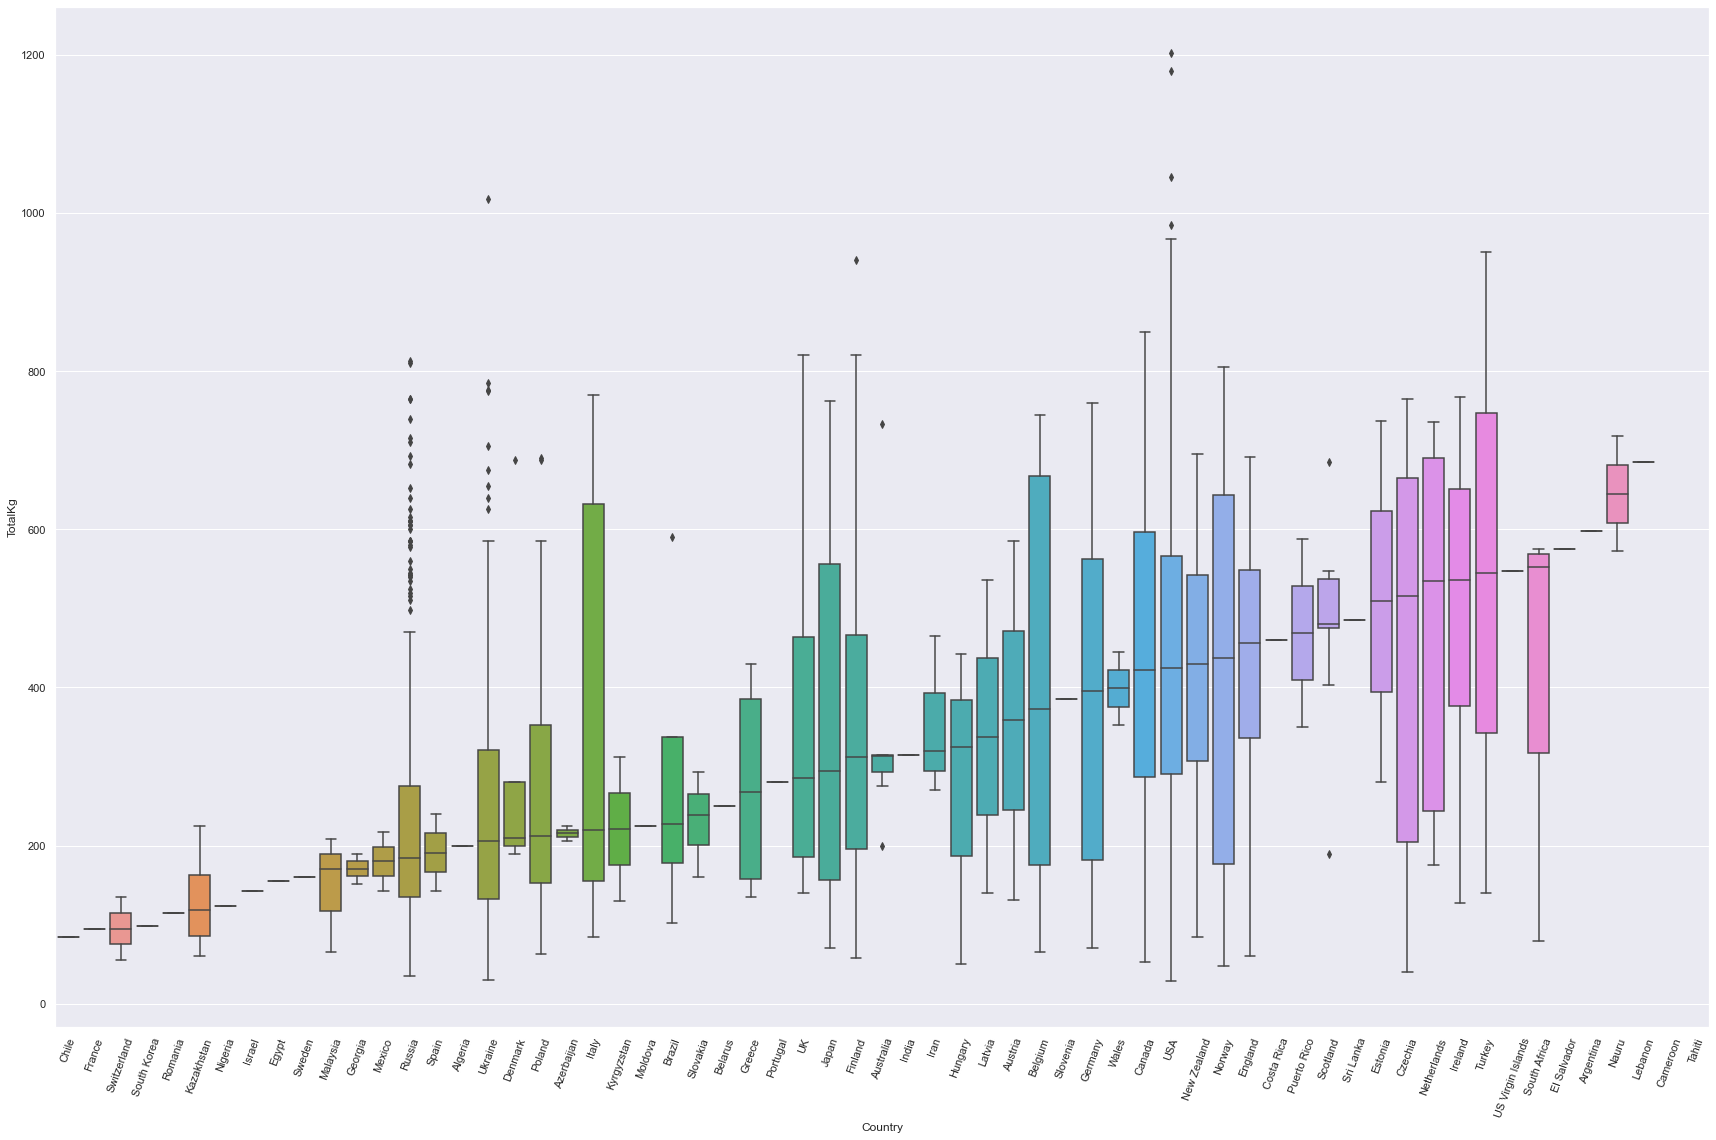

In [17]:
# Categorical: Sex, Country
# f, axes = plt.subplots(1, 2, figsize = (20,12))
f = plt.figure(figsize = (24, 16))


countryOrder = correlationWithPersonal_df.groupby(by = 'Country')['TotalKg'].median().sort_values().index
sb.boxplot(x = 'Country', y = 'TotalKg', data = correlationWithPersonal_df, order = countryOrder)

plt.xticks(rotation=70)
plt.tight_layout()

<AxesSubplot:xlabel='Sex', ylabel='TotalKg'>

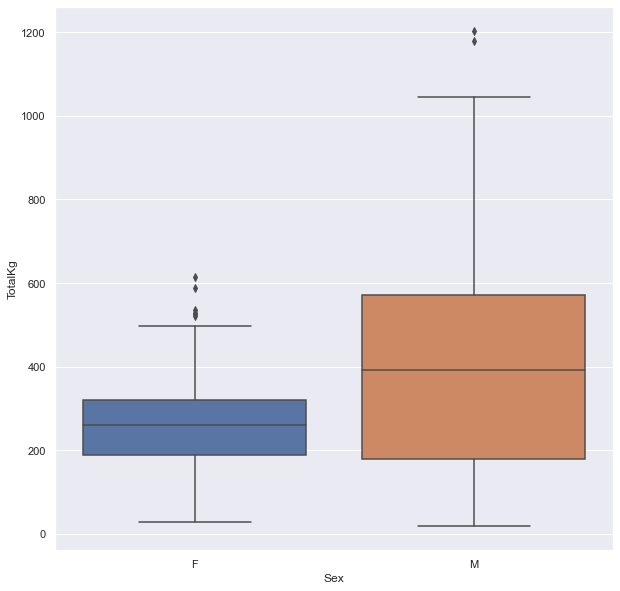

In [19]:
f = plt.figure(figsize = (10,10))

sexOrder = correlationWithPersonal_df.groupby(by = 'Sex')['TotalKg'].median().sort_values().index

sb.boxplot(x = 'Sex', y = 'TotalKg', data = correlationWithPersonal_df, order = sexOrder)

### Observation
---

#### Country with TotalKg:
- There seems to be differences between each country's boxplot. While there is a distinct increase in median across countries, most countries' interquartile range is large (~200 - 400 kg) and this can cause a less distinct difference between each country's boxplot as there is a greater degree of overlap in boxplots. Overall, it seems that country does have a moderately strong correlation with `TotalKg`. 
<br>
<br>

#### Sex with TotalKg:
- There is a noticeable difference between Female and Male as seen by the clear difference in boxplot for each gender. For example, median of Male is larger than the Female's third Quartile by a considerable amount of ~50kg. Judging from boxplot alone, it seems that there is a stronger correlation between `Sex` and `TotalKg` than `Country` and `TotalKg`. However, this observation may be biased due to gender having much lesser categories resulting in a much simpler boxplot plot.

In [45]:
# Next, let's explore the correlation between division and TotalKg

# First find out how many divisions are there
print("No. of unique divisions: ", len(correlationWithEventSpecific_df['Division'].value_counts()))
correlationWithEventSpecific_df['Division'].value_counts()

No. of unique divisions:  315


Open            508
Girls           322
MR-O            115
Amateur Open    101
Pro Open         96
               ... 
Over 70           1
MR-M2b            1
M_MR_1_AAPF       1
MR-Sj             1
M55+              1
Name: Division, Length: 315, dtype: int64

In [51]:
# To get a more meaningful comparison, let's consider only divisions that have 50 or more data rows
divisionFreq = correlationWithEventSpecific_df['Division'].value_counts()
selectedDivisionsIndex = divisionFreq[divisionFreq > 50].index
selectedData = correlationWithEventSpecific_df[correlationWithEventSpecific_df['Division'].isin(selectedDivisionsIndex)]

# Verify our filtering
selectedData['Division'].value_counts()

Open            508
Girls           322
MR-O            115
Amateur Open    101
Pro Open         96
FR-O             75
Juniors          57
Name: Division, dtype: int64

<AxesSubplot:xlabel='Division', ylabel='TotalKg'>

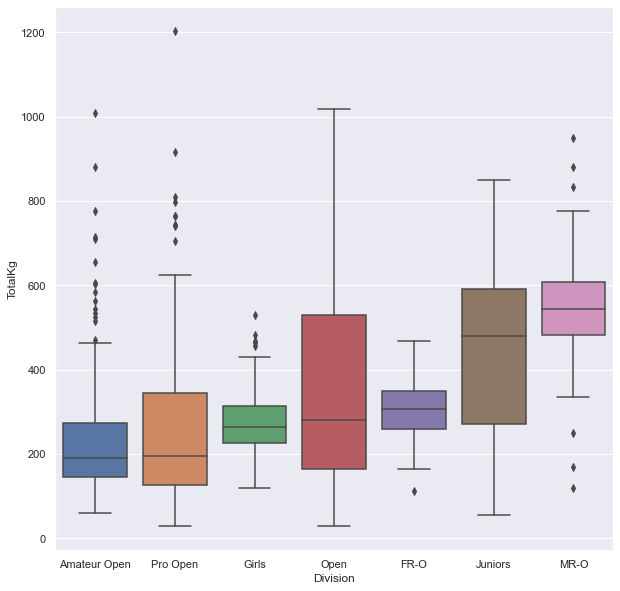

In [56]:
# Let's find out the correlation between TotalKg and Division
f = plt.figure(figsize = (10,10))

divisionOrder = selectedData.groupby(by = 'Division')['TotalKg'].median().sort_values().index
sb.boxplot(x = 'Division', y = 'TotalKg', data = correlationWithEventSpecific_df, order = divisionOrder)

<AxesSubplot:xlabel='Equipment', ylabel='TotalKg'>

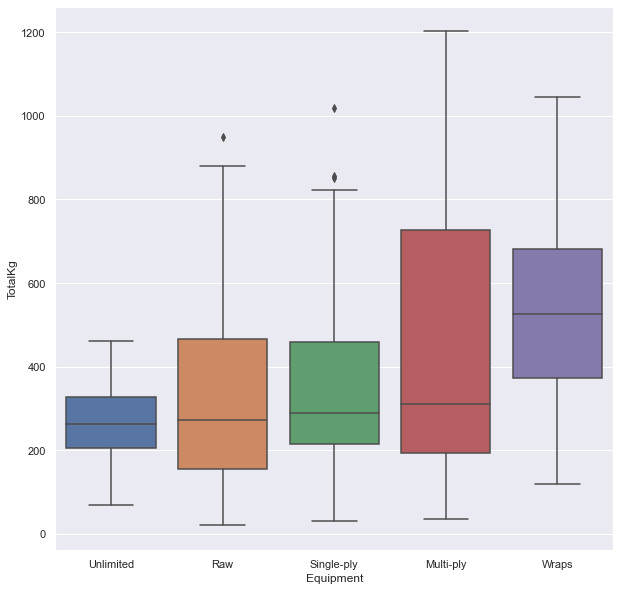

In [21]:
# Next, let's look into the correlation between TotalKg and other factors like `Equipment` and `Division`
correlationWithEventSpecific_df = train_df[['Equipment', 'Division', 'TotalKg']]

# First, let's explore correlation with `Equipment`
f = plt.figure(figsize = (10, 10))

equipmentOrder = correlationWithEventSpecific_df.groupby(by = 'Equipment')['TotalKg'].median().sort_values().index
sb.boxplot(x = 'Equipment', y = 'TotalKg', data = correlationWithEventSpecific_df, order = equipmentOrder)

### Observation
---

#### Division with TotalKg:
- There do not seem to be a very strong correlation between `Division` and `TotalKg` as seen by most categories having a significant overlap in boxplot (i.e. Amateur Open, Pro Open, Girls, etc.). However, some events like MR-O (Mr Olympia) and Juniors seem to have a distinct distribution from otehr events where their median is more than the third quartile for most of the other events.
<br>
<br>
- There seems to be a few surprises within distribution that are worth exploring.
    - For example, a greater difference between Amateur Open and Pro Open was expected but the two boxplot seem to overlap to a moderate extent. However, there seem to be many outliers for Amateur Ope and this could be aspiring professionals.
    - Juniors division's median seems greater than divisions like Pros Open / Open Division with their median being greater or comparable to the two event's third quartile. However, this boxplot may not be entirely accurate as Juniors division have the least datapoints of 57.
<br>
<br>

##### Followup:
- Let's look at the `Age` and `BodyweightKg` for Junior division, Amateur Open, Pro Open and Open.
<br>
<br>

#### Equipment with TotalKg:
- Overall, the boxplot for each kind of equipment seems to show a great extent of overlap, suggesting no correlations between `Equipment` and `TotalKg`. However, the boxplot for 'Wraps' seem to be distinctly different from the rest

In [82]:
# Lets plot the distribution for Age and BodyweightKg for these 4 categories

juniorsDivision_df = train_df[(train_df['Division'] == 'Juniors')]
amateurOpenDivision_df = train_df[(train_df['Division'] == 'Amateur Open')]
proOpenDivision_df = train_df[(train_df['Division'] == 'Pro Open')]
openDivision_df = train_df[(train_df['Division'] == 'Open')]

chosenDivisions_df = [juniorsDivision_df, amateurOpenDivision_df, proOpenDivision_df, openDivision_df]

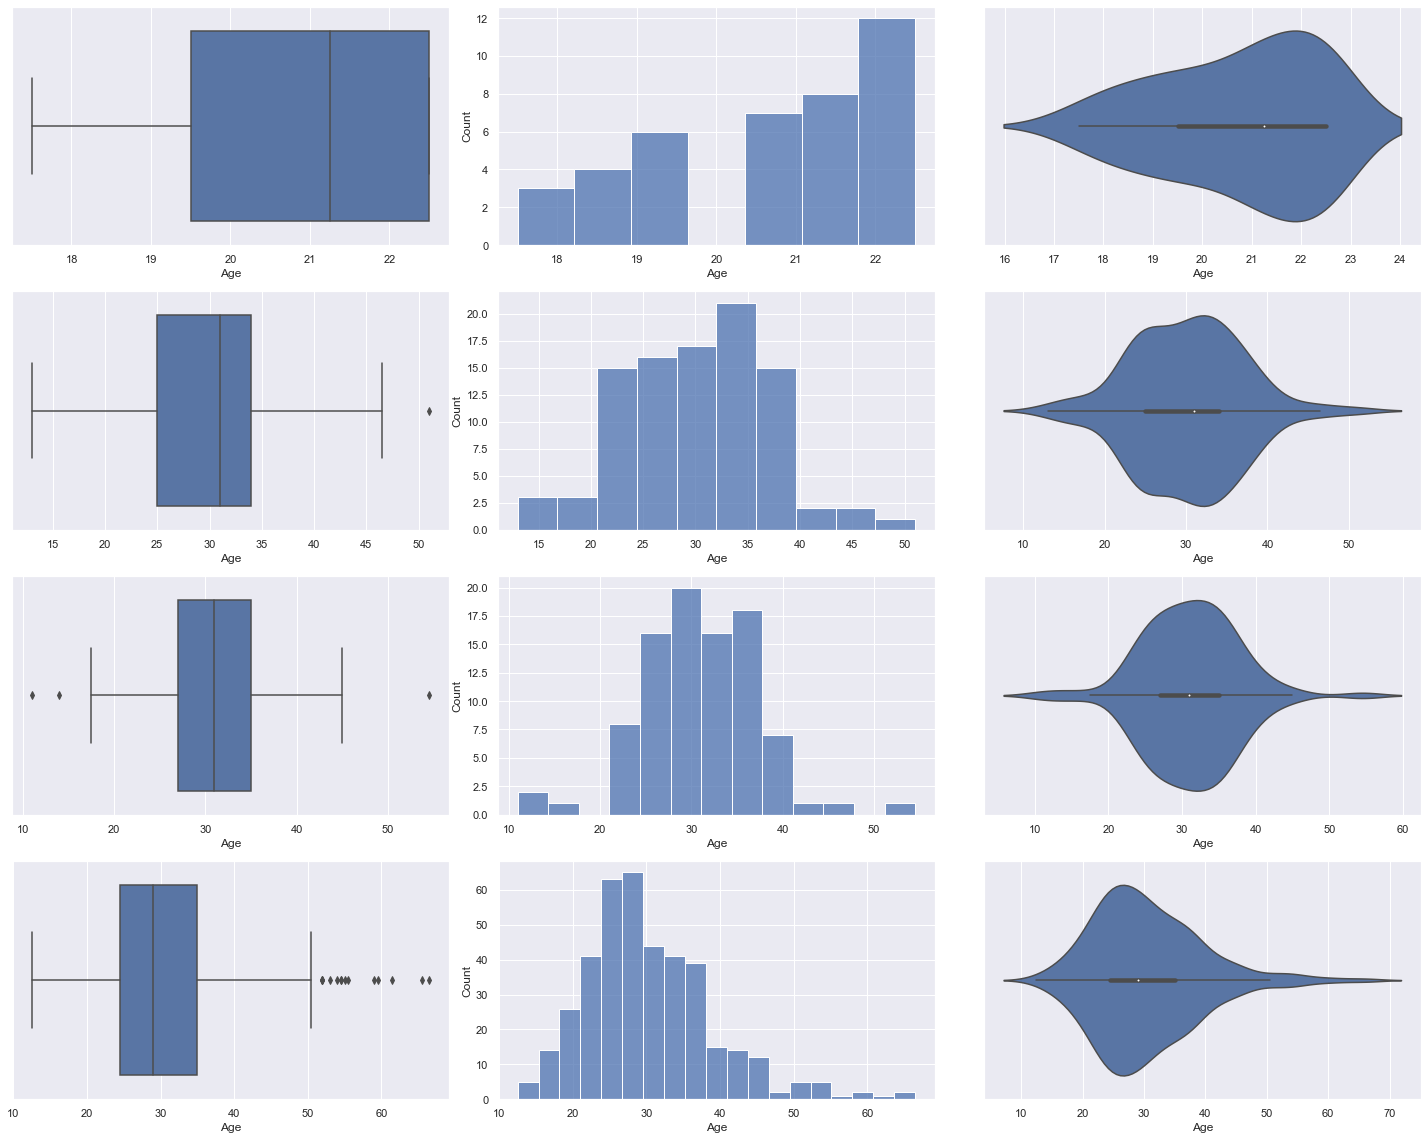

In [89]:
f, axes = plt.subplots(4, 3, figsize = (20,16))

count = 0
for df in chosenDivisions_df:
    sb.boxplot(x = 'Age', data = df, orient = 'h', ax = axes[count, 0])
    sb.histplot(x = 'Age', data = df, ax = axes[count, 1])
    sb.violinplot(x = 'Age', data = df, orient = 'h', ax = axes[count, 2])
    count += 1
    
plt.tight_layout()

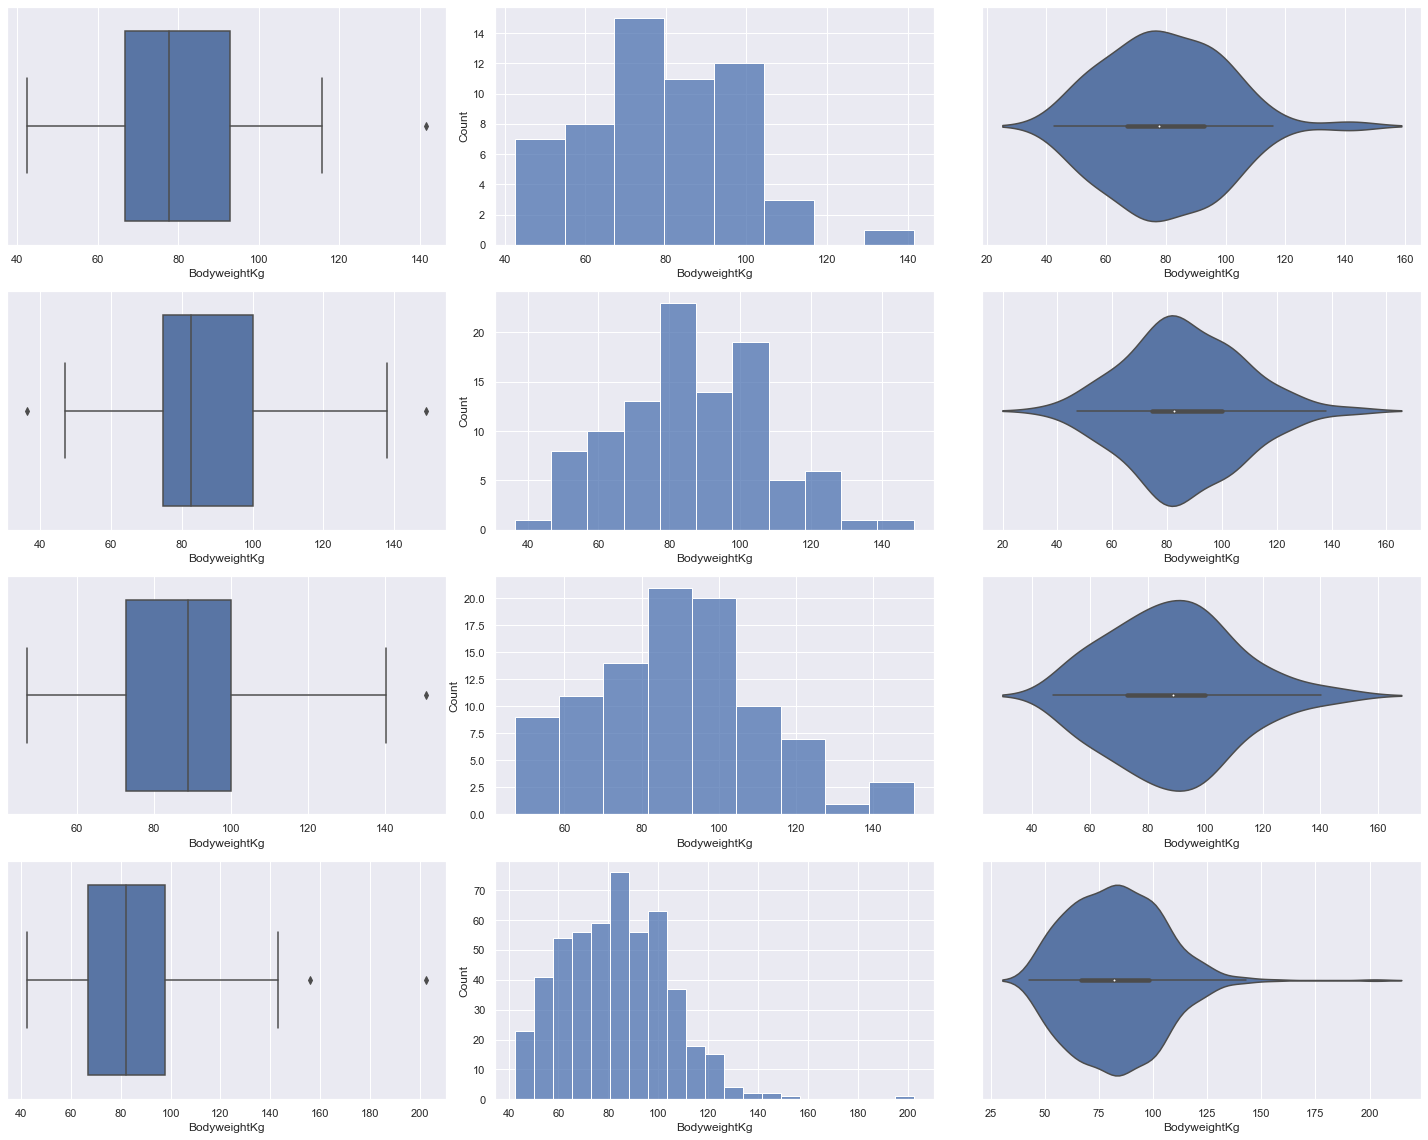

In [90]:
f, axes = plt.subplots(4, 3, figsize = (20,16))

count = 0
for df in chosenDivisions_df:
    sb.boxplot(x = 'BodyweightKg', data = df, orient = 'h', ax = axes[count, 0])
    sb.histplot(x = 'BodyweightKg', data = df, ax = axes[count, 1])
    sb.violinplot(x = 'BodyweightKg', data = df, orient = 'h', ax = axes[count, 2])
    count += 1
    
plt.tight_layout()

### Observation
---

#### Age across Divisions:
- Seems that `Age`'s distribution for Amateur Open, Pro Open and Open are roughly the same with 50% of distribution centred about the median at approximately 25 ~ 35. It is very clear that the age distribution for Juniors is much younger compared to other divisions.
- As for skewness of distribution, Junior division has a high negative skew while for Open division, there seems to be a positive skew. The other two divisions does not seem to have much skew.
<br>
<br>

#### BodyweightKg across Divisions:
- Junior division seems to have in general, lower `BodyweightKg` than other divisions. This is seen by the lowest median for `BodyweightKg` and with its interquartile range existing over a smaller range of values compared to that of Amateur Open and Pro Open, but not so much for Open division.
- In all of the divsions, there seems to be a positive skew caused by a few outliers who have very high bodyweights.
<br>
<br>

### Possible hunch:
---
- The main variable that distinguish Juniors from other categories is their `Age`, alongside with the fact that a lower bodyweight may put them at a slight disadvantage. Also, based on the previous boxplot with `Division` against `TotalKg`, the Junior Division in general are able to powerlift a heavier weight. Combining this two factors, it seems that `Age` is quite an important factor in determining how much one can lift.